In [1]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gmaps
import imp

# Import API key
temp_file = imp.load_source("gkey", "../Project1/gkey.py")

gkey = temp_file.gkey

del temp_file

In [2]:
#Read in Data
data_df = pd.read_csv(
    "Data.csv", dtype="object", encoding="utf-8")
data_df.head()


,Zip Code,Grocery Store Count,Population,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,White Identified,Black Identified,Asian Identified,White %,Black %,Asian %,Lat,Lng,Obese %,Overweight %,Overweight or Obese %
0,63118,4.0,28810.0,29880.0,19201.0,9996.0,34.696286011801455,6.626171468240194,12177.0,15464.0,1031.0,42.26657410621312,53.67580701145435,3.578618535230823,38.5950619,-90.2291565,27.80%,33.90%,61.70%
1,63108,4.0,21345.0,39162.0,37387.0,5799.0,27.167955024595923,4.928554696650269,11550.0,7684.0,2156.0,54.111033028812365,35.999063012415085,10.100726165378308,38.647459,-90.25730999999999,16.90%,31.20%,48.10%
2,63116,3.0,44175.0,41273.0,24673.0,9304.0,21.06168647425014,4.5319750990379175,30977.0,9475.0,3756.0,70.12337294850029,21.44878324844369,8.502546689303905,38.5844866,-90.266699,25.20%,33.90%,59.00%
3,63104,2.0,20320.0,47816.0,32508.0,5150.0,25.344488188976378,4.409448818897638,10432.0,9616.0,354.0,51.338582677165356,47.32283464566929,1.7421259842519685,38.6160491,-90.2291565,22.20%,35.20%,57.40%
4,63123,2.0,50739.0,54212.0,29782.0,4315.0,8.50430635211573,3.510120420189598,47085.0,1627.0,2143.0,92.79843907053746,3.206606358028341,4.223575553321902,38.5580845,-90.3277829,28.60%,35.20%,63.80%


In [3]:
#Clean up DataFrame
data_df = data_df.fillna(0)
data_df["Obese %"]=data_df["Obese %"].str.replace("%","")
data_df = data_df.apply(pd.to_numeric, errors = 'ignore')
data_df.head()


,Zip Code,Grocery Store Count,Population,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,White Identified,Black Identified,Asian Identified,White %,Black %,Asian %,Lat,Lng,Obese %,Overweight %,Overweight or Obese %
0,63118,4.0,28810.0,29880.0,19201.0,9996.0,34.696286,6.626171,12177.0,15464.0,1031.0,42.266574,53.675807,3.578619,38.595062,-90.229156,27.8,33.90%,61.70%
1,63108,4.0,21345.0,39162.0,37387.0,5799.0,27.167955,4.928555,11550.0,7684.0,2156.0,54.111033,35.999063,10.100726,38.647459,-90.257310,16.9,31.20%,48.10%
2,63116,3.0,44175.0,41273.0,24673.0,9304.0,21.061686,4.531975,30977.0,9475.0,3756.0,70.123373,21.448783,8.502547,38.584487,-90.266699,25.2,33.90%,59.00%
3,63104,2.0,20320.0,47816.0,32508.0,5150.0,25.344488,4.409449,10432.0,9616.0,354.0,51.338583,47.322835,1.742126,38.616049,-90.229156,22.2,35.20%,57.40%
4,63123,2.0,50739.0,54212.0,29782.0,4315.0,8.504306,3.510120,47085.0,1627.0,2143.0,92.798439,3.206606,4.223576,38.558084,-90.327783,28.6,35.20%,63.80%


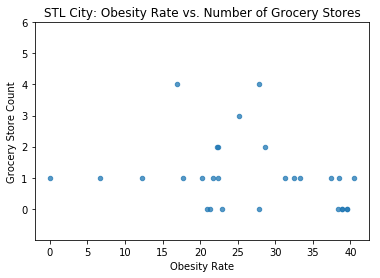

In [13]:
#Scatter Num Grocery and Obesity Rate
data_df.plot.scatter(x="Obese %", y= "Grocery Store Count", alpha = 0.75)
plt.title('STL City: Obesity Rate vs. Number of Grocery Stores')
plt.xlabel('Obesity Rate')
plt.ylabel('Grocery Store Count')
plt.ylim(-1,4)
plt.yticks([0,1,2,3,4,5,6])

plt.savefig("GroceryVsObesity.png")

In [14]:
#Find Pearson Corr Coeff Between Obesity Rate and Number of Grocery Stores
corrgo_data_df = data_df[['Grocery Store Count', 'Obese %']]
corr_go = corrgo_data_df.corr(method = 'pearson')
corr_go

,Grocery Store Count,Obese %
Grocery Store Count,1.000000,-0.262062
Obese %,-0.262062,1.000000


In [15]:
# Heatmap for Obesity Rate
grocery_df = pd.read_csv(
    "grocery_stl.csv", dtype="object", encoding="utf-8")

gmaps.configure(api_key=gkey)

locations = grocery_df[["Lat", "Lng"]].astype(float)
obesity_rate = data_df["Obese %"].astype(float)
locations_zip = data_df[["Lat", "Lng"]].astype(float)

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations_zip, weights=obesity_rate, point_radius = 25)

heat_layer.point_radius = 25

store_layer = gmaps.symbol_layer(
    locations, fill_color='rgba(300, 0, 0, 0.4)',
    stroke_color='rgba(300, 0, 0, 0.4)', scale=2
)

fig.add_layer(heat_layer)
fig.add_layer(store_layer)

fig

Figure(layout=FigureLayout(height='420px'))

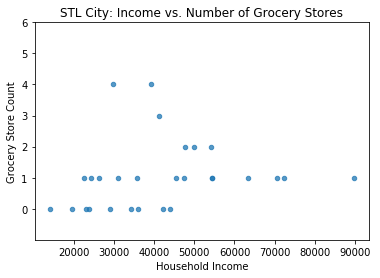

In [17]:
#Scatter Num Grocery and Household Income 
data_df.plot.scatter(x= 'Household Income', y='Grocery Store Count', alpha = 0.75)
plt.title('STL City: Income vs. Number of Grocery Stores')
plt.xlabel('Household Income')
plt.ylabel('Grocery Store Count')
plt.ylim(-1,4)
plt.yticks([0,1,2,3,4,5,6])

plt.savefig("GroceryVsIncome.png")

In [18]:
#Find Pearson Corr Coeff Between Household Income and Number of Grocery Stores
corrig_data_df = data_df[['Grocery Store Count', 'Household Income']]
corr_ig = corrig_data_df.corr(method = 'pearson')
corr_ig

,Grocery Store Count,Household Income
Grocery Store Count,1.000000,0.171173
Household Income,0.171173,1.000000


In [19]:
house_income = data_df["Household Income"].astype(float)

fig = gmaps.figure()

heat_layer = gmaps.heatmap_layer(locations_zip, weights=house_income, point_radius = 25)

heat_layer.point_radius = 25
heat_layer.gradient = ["rgba(102, 255, 0, 0)",
"rgba(255, 57, 0, 1)",
"rgba(255, 113, 0, 1)",
"rgba(255, 170, 0, 1)",
"rgba(249, 198, 0, 1)",
"rgba(244, 227, 0, 1)",
"rgba(238, 255, 0, 1)",
"rgba(193, 255, 0, 1)",
"rgba(147, 255, 0, 1)",
"rgba(102, 255, 0, 1)",
"rgba(102, 255, 0, 0)"]

fig = gmaps.figure()

fig.add_layer(heat_layer)
fig.add_layer(store_layer)

fig

Figure(layout=FigureLayout(height='420px'))

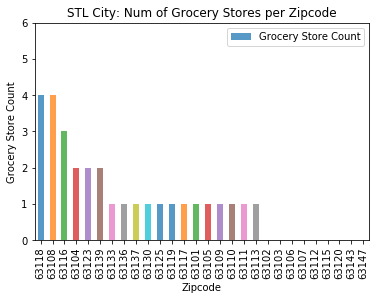

In [21]:
#Make bar Graph for zip code and num grocery stores 
data_df.plot.bar(x= 'Zip Code', y ='Grocery Store Count', alpha = 0.75)
plt.title('STL City: Num of Grocery Stores per Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Grocery Store Count')
plt.yticks([0,1,2,3,4,5,6])

plt.savefig("GroceryBarGraph.png")

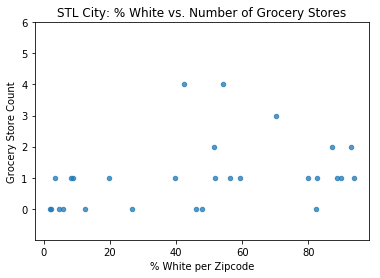

In [22]:
#Scatterplot comparing %White to Number of Grocery Stores
data_df.plot.scatter(x= 'White %', y='Grocery Store Count', alpha = 0.75)
plt.title('STL City: % White vs. Number of Grocery Stores')
plt.xlabel('% White per Zipcode')
plt.ylabel('Grocery Store Count')
plt.ylim(-1,4)
plt.yticks([0,1,2,3,4,5,6])

plt.savefig("GroceryVsWhitePopulation.png")

In [23]:
#Pearson Corr Coeff for %White and Num Grocery Stores 
corrwg_data_df = data_df[['Grocery Store Count', 'White %']]
corr_wg = corrwg_data_df.corr(method = 'pearson')
corr_wg

,Grocery Store Count,White %
Grocery Store Count,1.000000,0.341974
White %,0.341974,1.000000
